# Generating Model Metrics Graph - JMUBEN Dataset

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
PATH_EVALUATIONS = "./evaluations"
PATH_MLP_METRICS = PATH_EVALUATIONS + "/RNAs-MLP"
PATH_CNN_METRICS = PATH_EVALUATIONS + "/CNNs"
PATH_MLP_1HL = PATH_MLP_METRICS + "/metrics_mlp_1hl_experiments.csv"
PATH_MLP_2HL = PATH_MLP_METRICS + "/metrics_mlp_2hl_experiments.csv"

## 1. Selecting the five best model metrics

In [3]:
metrics = {}

### 1.1. RNAs MLP one hidden layer

In [4]:
df_mlp1 = pd.read_csv(PATH_MLP_1HL)
df_mlp1.head()

,Experiment,Architectures,Total Params,GFLOPS,Training Time (sec),Test Accuracy,Test F1 Weightet,Test Precision Weighted,Test Recall Weighted
0,1,4,81,8.002895e-08,1.799349,0.615485,0.525966,0.585156,0.615485
1,1,5,100,9.401882e-08,1.914510,0.667464,0.626959,0.619255,0.667464
2,1,6,119,2.995345e-07,0.721119,0.351039,0.314196,0.285170,0.351039
3,1,7,138,2.538573e-07,0.992684,0.595901,0.528823,0.506131,0.595901
4,1,8,157,7.266233e-08,3.963539,0.793567,0.777952,0.786391,0.793567


In [5]:
mlp1 = [8, 14, 15, 16]

In [6]:
for architecture in mlp1:
    f1_score = [f1 for f1 in df_mlp1["Test F1 Weightet"].loc[df_mlp1["Architectures"] == architecture]]
    metrics[f"({str(architecture)})"] = f1_score

metrics

{'(8)': [0.777952138092672, 0.5994696365792517, 0.6242460855415174],
 '(14)': [0.7069571587301429, 0.6534246122067761, 0.6865488519223463],
 '(15)': [0.7367704351837503, 0.6634691010889859, 0.6950022997435773],
 '(16)': [0.6485927814411426, 0.6817882864083062, 0.6465368452712326]}

### 1.2. RNAs MLP two hidden layers

In [7]:
df_mlp2 = pd.read_csv(PATH_MLP_2HL)
df_mlp2.head()

,Experiment,Architectures,Total Params,GFLOPS,Training Time (sec),Test Accuracy,Test F1 Weightet,Test Precision Weighted,Test Recall Weighted
0,1,"(1, 14)",117,1.847504e-07,1.050065,0.320068,0.155210,0.102444,0.320068
1,1,"(2, 13)",137,4.619214e-08,5.065797,0.659266,0.567173,0.544528,0.659266
2,1,"(3, 12)",155,2.019025e-07,1.337279,0.573185,0.485153,0.455116,0.573185
3,1,"(4, 11)",171,1.465804e-07,2.060303,0.640307,0.593800,0.555253,0.640307
4,1,"(5, 10)",185,1.245983e-07,2.648510,0.614062,0.509854,0.632787,0.614062


In [8]:
mlp2 = "(7, 8)"

In [9]:
f1_score = [f1 for f1 in df_mlp2["Test F1 Weightet"].loc[df_mlp2["Architectures"] == mlp2]]
metrics[mlp2] = f1_score

metrics

{'(8)': [0.777952138092672, 0.5994696365792517, 0.6242460855415174],
 '(14)': [0.7069571587301429, 0.6534246122067761, 0.6865488519223463],
 '(15)': [0.7367704351837503, 0.6634691010889859, 0.6950022997435773],
 '(16)': [0.6485927814411426, 0.6817882864083062, 0.6465368452712326],
 '(7, 8)': [0.7094545664617159, 0.6233536718497168, 0.6773116700857484]}

### 1.3. CNNs

In [10]:
df_cnns = pd.read_csv(f"{PATH_CNN_METRICS}/metrics_experiments_CNNs.csv")

In [11]:
cnns = ["MobileNetV2", "ShuffleNet", "InceptionV3", "VGG-16", "EfficientNetV2S"]

In [12]:
for architecture in cnns:
    f1_score = [f1 for f1 in df_cnns["Test F1 Weightet"].loc[df_cnns["Architectures"] == architecture]]
    metrics[architecture] = f1_score

metrics

{'(8)': [0.777952138092672, 0.5994696365792517, 0.6242460855415174],
 '(14)': [0.7069571587301429, 0.6534246122067761, 0.6865488519223463],
 '(15)': [0.7367704351837503, 0.6634691010889859, 0.6950022997435773],
 '(16)': [0.6485927814411426, 0.6817882864083062, 0.6465368452712326],
 '(7, 8)': [0.7094545664617159, 0.6233536718497168, 0.6773116700857484],
 'MobileNetV2': [0.0355011316120248, 0.0355011316120248, 0.1587363798970223],
 'ShuffleNet': [0.9997722683163636, 0.9996585922009062, 0.9991463383638444],
 'InceptionV3': [0.9989751807530828, 0.9996013761898124, 0.99834804106077],
 'VGG-16': [0.9984606334762623, 0.9976588961362228, 0.9999430832722312],
 'EfficientNetV2S': [0.997493234030104, 0.999032382554556, 0.9997722928158996]}

## 2. Plotting model metrics graph

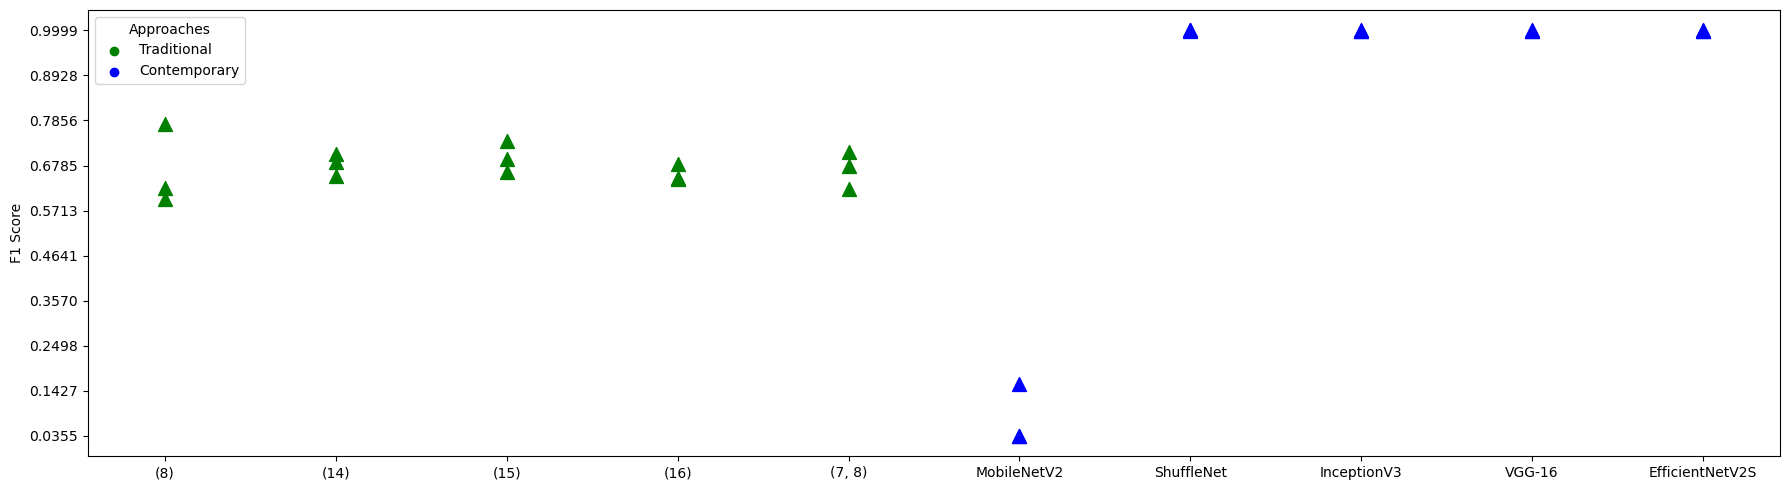

In [13]:
colors = {"Traditional": 'g', "Contemporary": 'b'}

plt.figure(figsize=(18, 5))
for i, (architecture, metric) in enumerate(metrics.items()):
    color = list(colors.values())[i // 5]
    plt.scatter([architecture] * 3, metric, marker='^', color=color, s=100)

for key in colors.keys():
    plt.scatter([], [], color=colors[key], label=key)

f1_min = min(min(f1) for f1 in metrics.values())
f1_max = max(max(f1) for f1 in metrics.values())
yticks = np.linspace(f1_min, f1_max, 10)

plt.yticks(yticks)
plt.ylabel("F1 Score") 
plt.legend(title="Approaches")
plt.tight_layout()
plt.savefig("./graphics/model_metrics_graph.jpg")

plt.show()